In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
from wm import Image as Image
from wm.moments import RadialHarmonicFourierMoment
from wm.moments import ZernikeMoment
from wm.moments import PseudoZernikeMoment

In [4]:
w = np.random.randint(2, size=32)

## RHFM

In [5]:
%%time
N = 128
order = 50
im = Image('images/monochrome/arctichare_'+str(N)+'.png', colored=False)
RHFM = RadialHarmonicFourierMoment(order, N, Vfile='V_RHFM_'+str(N)+'.h5')

CPU times: user 324 ms, sys: 487 ms, total: 812 ms
Wall time: 6.24 s


In [6]:
%%time
E = RHFM.encode(im, w, verbose=True)

CPU times: user 2.2 s, sys: 30.1 ms, total: 2.23 s
Wall time: 2.12 s


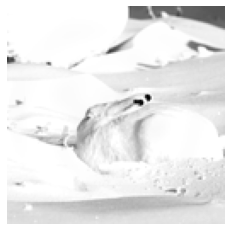

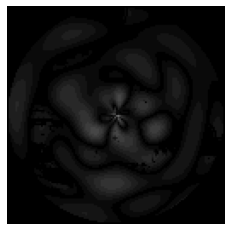

In [7]:
E.show()
imdiff = np.abs(im.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [8]:
%%time
w2 = RHFM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0]
[0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0]
CPU times: user 373 ms, sys: 40.2 ms, total: 413 ms
Wall time: 378 ms


In [9]:
RHFM.unloadVfile()

## ZM

In [10]:
%%time
N = 128
order = 50
im = Image('images/monochrome/arctichare_'+str(N)+'.png', colored=False)
ZM = ZernikeMoment(order, N, Vfile='V_ZM_'+str(N)+'.h5')

CPU times: user 490 ms, sys: 580 ms, total: 1.07 s
Wall time: 8.1 s


In [11]:
%%time
E = ZM.encode(im, w, verbose=True)

CPU times: user 2.37 s, sys: 55.6 ms, total: 2.43 s
Wall time: 2.32 s


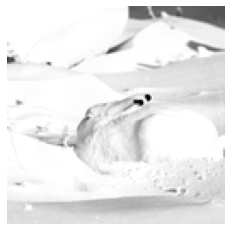

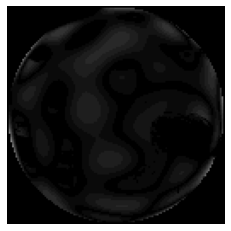

In [12]:
E.show()
imdiff = np.abs(im.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [13]:
%%time
w2 = ZM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0]
[0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0]
CPU times: user 621 ms, sys: 18.9 ms, total: 639 ms
Wall time: 578 ms


In [14]:
ZM.unloadVfile()

## PZM

In [15]:
%%time
N = 128
order = 50
im = Image('images/monochrome/arctichare_'+str(N)+'.png', colored=False)
PZM = PseudoZernikeMoment(order, N, Vfile='V_PZM_'+str(N)+'.h5')

CPU times: user 244 ms, sys: 1.1 s, total: 1.35 s
Wall time: 7.11 s


In [16]:
%%time
E = PZM.encode(im, w, verbose=True)

CPU times: user 2.67 s, sys: 19.3 ms, total: 2.69 s
Wall time: 2.57 s


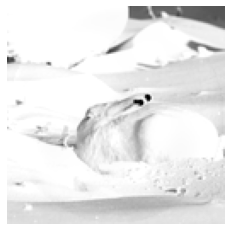

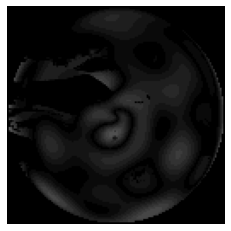

In [17]:
E.show()
imdiff = np.abs(im.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [18]:
%%time
w2 = PZM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0]
[0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0]
CPU times: user 593 ms, sys: 27.6 ms, total: 621 ms
Wall time: 581 ms


In [19]:
PZM.unloadVfile()